In [1]:
!date

Tue Jun  3 02:13:13 PM EDT 2025


In [2]:
pwd

'/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code'

In [51]:
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import ants
from tqdm import tqdm
import warnings

In [5]:
indir='../Data/StudyForrest/ensembles_last_CVAE/'
analysis_name = 'DeepCor-ABCD-v10'
analysis_dir = os.path.join(indir,analysis_name)
analysis_dir

'../Data/StudyForrest/ensembles_last_CVAE/DeepCor-ABCD-v10'

In [175]:
def run_done_check(fn = 'signal_S{s}_R{r}_avg.nii.gz'):
    done_check = np.zeros((34,2))
    for s in range(34):
        for r in [1,2]:
            done_check[s,r-1]=os.path.exists(os.path.join(analysis_dir,fn.format(s=s,r=r)))

    plt.figure(figsize=(25,5))
    sns.heatmap(done_check.transpose(),annot=True,cbar=False,vmin=0,vmax=1)
    plt.ylabel('subjects')
    plt.xlabel('runs')
    plt.title(fn,fontsize=16)
    
#run_done_check('signal_S{s}_R{r}_avg.nii.gz')
#run_done_check('outputs_S{s}_R{r}_rep_1.pickle')

In [97]:
def avg_deriv_runs(fn,s):
    ims = [ants.image_read(os.path.join(analysis_dir,fn.format(s=s,r=r))) for r in [1,2]]
    ims[0].new_image_like(np.array([im.numpy() for im in ims]).mean(axis=0)).to_filename(os.path.join(analysis_dir,fn.format(s=s,r='avg')))

In [98]:
def avg_deriv_subs(fn):
    ims = [ants.image_read(os.path.join(analysis_dir,fn.format(s=s,r='avg'))) for s in range(34)]
    arr = np.array([im.numpy() for im in ims])
    nans = np.argwhere(np.isnan(arr).sum(-1).sum(-1).sum(-1)!=0)
    if len(nans)>0:
        string = f'NaNs in {nans}'
        warnings.warn(string)
    ims[0].new_image_like(arr.mean(axis=0)).to_filename(os.path.join(analysis_dir,fn.format(s='avg',r='avg')))

In [99]:
fns = ['preproc_contrast_face_S{s}_R{r}.nii.gz',
'preproc_contrast_place_S{s}_R{r}.nii.gz',
'preproc_corr2face_S{s}_R{r}.nii.gz',
'preproc_corr2place_S{s}_R{r}.nii.gz',
       
'compcor_contrast_face_S{s}_R{r}.nii.gz',
'compcor_contrast_place_S{s}_R{r}.nii.gz',
'compcor_corr2face_S{s}_R{r}.nii.gz',
'compcor_corr2place_S{s}_R{r}.nii.gz',

'signal_contrast_face_S{s}_R{r}.nii.gz',
'signal_contrast_place_S{s}_R{r}.nii.gz',
'signal_corr2face_S{s}_R{r}.nii.gz',
'signal_corr2place_S{s}_R{r}.nii.gz',]

In [100]:
[[avg_deriv_runs(fn,s) for s in range(34)] for fn in tqdm(fns)];

100%|██████████| 12/12 [00:18<00:00,  1.58s/it]


In [101]:
[avg_deriv_subs(fn) for fn in tqdm(fns)];

100%|██████████| 12/12 [00:06<00:00,  1.76it/s]


In [110]:
ffa = ants.image_read('../Misc/ffa_mask_resampled.nii')
ffa_mask = ffa.numpy()==1

ppa = ants.image_read('../Misc/ppa_mask_resampled.nii.gz')
ppa_mask = ppa.numpy()==1

In [130]:
results = {}

In [137]:
def get_roi_avg_values(fn):
    ims = [ants.image_read(os.path.join(analysis_dir,fn.format(s=s,r='avg'))) for s in range(34)]

    if 'face' in fn:
        mask=ffa_mask
    elif 'place' in fn:
        mask=ppa_mask
    else:
        raise Exception('bad"')

    vals = np.array([im.numpy()[ffa_mask].mean() for im in ims])
    return vals

In [140]:
results['preproc_contrast_face'] = get_roi_avg_values('preproc_contrast_face_S{s}_R{r}.nii.gz')
results['preproc_contrast_place'] = get_roi_avg_values('preproc_contrast_place_S{s}_R{r}.nii.gz')
results['preproc_corr_face'] = get_roi_avg_values('preproc_corr2face_S{s}_R{r}.nii.gz')
results['preproc_corr_place'] = get_roi_avg_values('preproc_corr2place_S{s}_R{r}.nii.gz')

results['compcor_contrast_face'] = get_roi_avg_values('compcor_contrast_face_S{s}_R{r}.nii.gz')
results['compcor_contrast_place'] = get_roi_avg_values('compcor_contrast_place_S{s}_R{r}.nii.gz')
results['compcor_corr_face'] = get_roi_avg_values('compcor_corr2face_S{s}_R{r}.nii.gz')
results['compcor_corr_place'] = get_roi_avg_values('compcor_corr2place_S{s}_R{r}.nii.gz')

results['signal_contrast_face'] = get_roi_avg_values('signal_contrast_face_S{s}_R{r}.nii.gz')
results['signal_contrast_place'] = get_roi_avg_values('signal_contrast_place_S{s}_R{r}.nii.gz')
results['signal_corr_face'] = get_roi_avg_values('signal_corr2face_S{s}_R{r}.nii.gz')
results['signal_corr_place'] = get_roi_avg_values('signal_corr2place_S{s}_R{r}.nii.gz')

<BarContainer object of 3 artists>

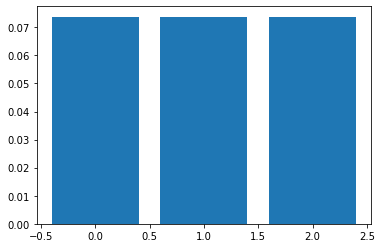

In [156]:
ys = [results['preproc_corr_face'].mean(),
results['compcor_corr_face'].mean(),
results['signal_corr_face'].mean(),]
xs = [0,1,2]
plt.bar(xs,ys)

<BarContainer object of 3 artists>

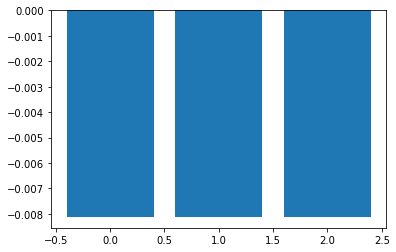

In [155]:
ys = [results['preproc_corr_place'].mean(),
results['compcor_corr_place'].mean(),
results['signal_corr_place'].mean(),]
xs = [0,1,2]
plt.bar(xs,ys)

<BarContainer object of 3 artists>

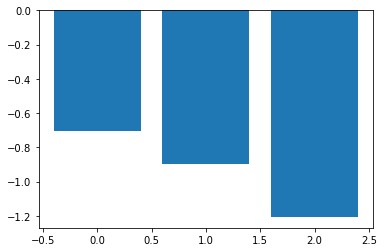

In [154]:
ys = [results['preproc_contrast_place'].mean(),
results['compcor_contrast_place'].mean(),
results['signal_contrast_place'].mean(),]
xs = [0,1,2]
plt.bar(xs,ys)

<BarContainer object of 3 artists>

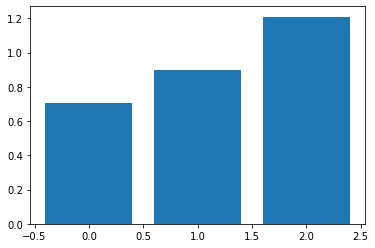

In [151]:
ys = [results['preproc_contrast_face'].mean(),
results['compcor_contrast_face'].mean(),
results['signal_contrast_face'].mean(),]
xs = [0,1,2]

plt.bar(xs,ys)

In [162]:
def pretty_t_test(vec1,vec2,ttl,alternative='two-sided'):
    from scipy.stats import ttest_rel
    
    #t,p = ttest_rel(np.arctanh(vec1),np.arctanh(vec2),alternative=alternative) # Fisher Z transform before t-testing
    t,p = ttest_rel(vec1,vec2,alternative=alternative) # Fisher Z transform before t-testing
    
    degf = len(vec1)-1
    diff = vec1.mean()-vec2.mean()

    if p < .001:
        print(f'{ttl} ΔM={diff:.3f}, t({int(degf)}) = {t:.2f}, p < .001')
    else:
        print(f'{ttl} ΔM={diff:.3f}, t({int(degf)}) = {t:.2f}, p = {p:.3f}')

In [164]:
pretty_t_test(results['signal_contrast_face'],results['preproc_contrast_face'],ttl='face contrast: signal > preproc')
pretty_t_test(results['signal_contrast_face'],results['compcor_contrast_face'],ttl='face contrast: signal > compcor')

face contrast: signal > preproc ΔM=0.505, t(33) = 2.93, p = 0.006
face contrast: signal > compcor ΔM=0.311, t(33) = 1.96, p = 0.059


In [209]:
def plot_scatter(vec1,vec2,xlabel='',ylabel='',title=''):
    plt.scatter(vec1, vec2, color='blue', label='Data points',s=150)
    f = 20
    plt.xticks(fontsize=f)
    plt.yticks(fontsize=f)

    # Adding the parity line (where y = x)
    # Determine the limits for the line based on the data range:
    min_val = min(np.min(vec1), np.min(vec2))
    max_val = max(np.max(vec1), np.max(vec2))
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Parity line (y=x)')

    # Add labels and title
    plt.xlabel(xlabel,fontsize=16,fontweight='bold')
    plt.ylabel(ylabel,fontsize=16,fontweight='bold')
    plt.title(title,fontsize=16,fontweight='bold')
    plt.grid(True)
    
    

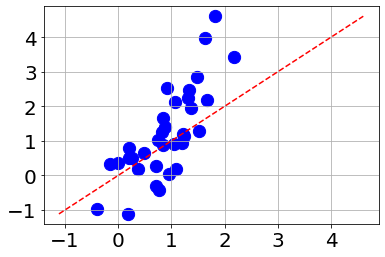

In [167]:
plot_scatter(results['compcor_contrast_face'],results['signal_contrast_face'])

In [187]:
def compute_framewise_displacement(motion_params, radius=50.0):
    """
    Compute framewise displacement (FD) from 6 motion parameters.

    Parameters
    ----------
    motion_params : np.ndarray, shape (6, T)
        Motion parameters where the first 3 rows are translations (in mm)
        and the last 3 rows are rotations (in degrees). T is the number of timepoints.
    radius : float, optional
        Radius (in mm) to convert rotational displacements (degrees → mm) via arc length.
        Default is 50 mm (commonly used approximation for head radius).

    Returns
    -------
    fd : np.ndarray, shape (T,)
        Framewise displacement at each timepoint. FD[0] is set to 0.
    """
    # Check shape: expect 6 rows
    if motion_params.ndim != 2 or motion_params.shape[0] != 6:
        raise ValueError("motion_params must have shape (6, T)")

    # Number of timepoints
    T = motion_params.shape[1]

    # Compute temporal differences (t → t-1) for each parameter
    diff = np.diff(motion_params, axis=1)  # shape = (6, T-1)

    # Separate translation diffs (rows 0,1,2) and rotation diffs (rows 3,4,5)
    trans_diff = np.abs(diff[0:3, :])             # shape (3, T-1), in mm
    rot_diff_deg = np.abs(diff[3:6, :])           # shape (3, T-1), in degrees

    # Convert rotation differences from degrees to mm: arc_length = radius * (angle_rad)
    # angle_rad = angle_deg * (π/180)
    rot_diff_mm = rot_diff_deg * (np.pi / 180.0) * radius  # shape (3, T-1)

    # Sum absolute diffs for each timepoint (t=2..T)
    # FD(t) = sum_{i=1..3} |Δtranslation_i| + sum_{j=1..3} |Δrotation_j (in mm)|
    fd_vals = np.sum(trans_diff, axis=0) + np.sum(rot_diff_mm, axis=0)  # shape (T-1,)

    # Prepend FD[0] = 0 to match original time axis
    fd = np.zeros(T, dtype=float)
    fd[1:] = fd_vals

    return fd

In [179]:
def load_pickle(fn):
    import pickle
    if os.path.exists(fn):
        with open(fn, 'rb') as file:
            loaded_dict = pickle.load(file)
    return loaded_dict

In [192]:
def get_FD(s,r):
    fn = os.path.join(analysis_dir,'outputs_S{s}_R{r}_rep_0.pickle'.format(s=s,r=r))
    if not os.path.exists(fn):
        fn = os.path.join(analysis_dir,'outputs_S{s}_R{r}_rep_1.pickle'.format(s=s,r=r))
    out = load_pickle(fn)
    fd = compute_framewise_displacement(out['confounds'])
    return fd

In [198]:
FDs = np.array([[get_FD(s,r).mean() for s in range(34)] for r in [1,2]])

In [219]:
np.corrcoef(diff,mot)

array([[1.        , 0.52990989],
       [0.52990989, 1.        ]])

In [216]:
diff = results['signal_contrast_face']-results['preproc_contrast_face']
mot = FDs.mean(axis=0)

In [217]:
I = np.argsort(mot)

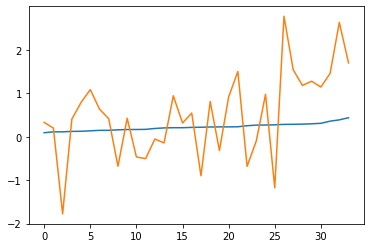

In [218]:
plt.plot(mot[I])
plt.plot(diff[I])